In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
# for data visualisation and statistical analysis
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("white")
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

In [2]:
urls = []
# define the basic url to crawl on
base_url = "https://www.avito.ma/fr/maroc/voitures-à_vendre?mpr=500000000&o="
# loop over the paginated urls
for i in range(1,250):
    # get the page url
    url = base_url+str(i)
    # get the request response
    resp  = requests.get(url)
    data = resp.text
    # transform it to bs object
    soup = BeautifulSoup(data, "lxml")

In [3]:
# loop over page links
for div in soup.findAll('div', {'class': 'item'}):
    a = div.findAll('a')[0]
    urls.append(a.get('href'))
    print(urls)

['https://www.avito.ma/fr/casablanca/voitures/golf_4__34339501.htm']
['https://www.avito.ma/fr/casablanca/voitures/golf_4__34339501.htm', 'https://www.avito.ma/fr/béni_mellal/voitures/Mouteur_fiat_uno_34339485.htm']
['https://www.avito.ma/fr/casablanca/voitures/golf_4__34339501.htm', 'https://www.avito.ma/fr/béni_mellal/voitures/Mouteur_fiat_uno_34339485.htm', 'https://www.avito.ma/fr/meknès/voitures/Opel_Corsa_tt_option_34339479.htm']
['https://www.avito.ma/fr/casablanca/voitures/golf_4__34339501.htm', 'https://www.avito.ma/fr/béni_mellal/voitures/Mouteur_fiat_uno_34339485.htm', 'https://www.avito.ma/fr/meknès/voitures/Opel_Corsa_tt_option_34339479.htm', 'https://www.avito.ma/fr/meknès/voitures/Volkswagen_Amarok_34339440.htm']
['https://www.avito.ma/fr/casablanca/voitures/golf_4__34339501.htm', 'https://www.avito.ma/fr/béni_mellal/voitures/Mouteur_fiat_uno_34339485.htm', 'https://www.avito.ma/fr/meknès/voitures/Opel_Corsa_tt_option_34339479.htm', 'https://www.avito.ma/fr/meknès/voitur

In [4]:
def get_the_urls():
    urls = []
    # define the basic url to crawl on
    basic_url = "https://www.avito.ma/fr/maroc/voitures-à_vendre?mpr=500000000&o="
    # loop over the paginated urls
    for i in range(1,250):
        # get the page url
        url = basic_url+str(i)
        # get the request response
        resp  = requests.get(url)
        data = resp.text
        # transform it to bs object
        soup = BeautifulSoup(data, "lxml")
        # loop over page links
        for div in soup.findAll('div', {'class': 'item'}):
            a = div.findAll('a')[0]
            urls.append(a.get('href'))


    df = pd.DataFrame(data={"url": urls})
    df.to_csv("vehicles_urls.csv", sep=',',index=False)

In [5]:
get_the_urls()

In [6]:
# set the column names
colnames=['price', 'year_model', 'mileage', 'fuel_type', 'mark', 'model', 'fiscal_power', 'sector', 'type', 'city'] 
# read the csv file as a dataframe
df = pd.read_csv("outputs.csv", sep=",", names=colnames, header=None)
# let's get some simple vision on our dataset
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135 000 DH,Année-Modèle:2013,Kilométrage:160 000 - 169 999,Type de carburant:Diesel,Marque:Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53 000 DH,Année-Modèle:2008,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59 000 DH,Année-Modèle:2007,Kilométrage:180 000 - 189 999,Type de carburant:Diesel,Marque:Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88 000 DH,Année-Modèle:2010,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Mercedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60 000 DH,Année-Modèle:2009,Kilométrage:130 000 - 139 999,Type de carburant:Essence,Marque:Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


In [7]:
# remove thos rows doesn't contain the price value
df = df[df.price.str.contains("DH") == True]
# remove the 'DH' caracters from the price
df.price = df.price.map(lambda x: x.rstrip('DH'))
# remove the space on it
df.price = df.price.str.replace(" ","")
# change it to integer value
df.price = pd.to_numeric(df.price, errors = 'coerce', downcast= 'integer')

In [8]:
# remove rows that don't contain the year_model value
df = df[df.year_model.str.contains("Année-Modèle") == True]
# remove the 'Année-Modèle:' from the year_model
df.year_model = df.year_model.map(lambda x: x.lstrip('Année-Modèle:').rstrip('ou plus ancien'))
# df.year_model = df.year_model.map(lambda x: x.lstrip('Plus de '))
# remove those lines having the year_model not set
df = df[df.year_model != ' -']
df = df[df.year_model != '']
# change it to integer value
df.year_model = pd.to_numeric(df.year_model, errors = 'coerce', downcast = 'integer')

In [9]:
# remove thos rows doesn't contain the year_model value
df = df[df.mileage.str.contains("Kilométrage") == True]
# remove the 'Kilométrage:' string from the mileage feature 
df.mileage = df.mileage.map(lambda x: x.lstrip('Kilométrage:'))
df.mileage = df.mileage.map(lambda x: x.lstrip('Plus de '))
# remove those lines having the mileage values null or '-'
df = df[df.mileage != '-']
# we have only one value type that is equal to 500 000, all the other ones contain two values
if any(df.mileage != '500 000'):
    # create two columns minim and maxim to calculate the mileage mean
    df['minim'], df['maxim'] = df.mileage.str.split('-', 1).str
    # remove spaces from the maxim & minim values 
    df['maxim'] = df.maxim.str.replace(" ","")
    df['minim'] = df.minim.str.replace(" ","")
    df['maxim'] = df['maxim'].replace(np.nan, 500000)
    # calculate the mean of mileage 
    df.mileage = df.apply(lambda row: (int(row.minim) + int(row.maxim)) / 2, axis=1)
    # now that the mileage is calculated so we do not need the minim and maxim values anymore
    df = df.drop(columns=['minim', 'maxim'])

In [10]:
# remove the 'Type de carburant:' string from the carburant_type feature
df.fuel_type = df.fuel_type.map(lambda x: x.lstrip('Type de carburant:'))

In [11]:
# remove the 'Marque:' string from the mark feature
df['mark'] = df['mark'].map(lambda x: x.replace('Marque:', ''))
df = df[df.mark != '-']
# remove the 'Modèle:' string from model feature 
df['model'] = df['model'].map(lambda x: x.replace('Modèle:', ''))

In [12]:
df.fiscal_power.value_counts()

Puissance fiscale:-                5624
Puissance fiscale:6 CV             1011
Puissance fiscale:8 CV              692
Puissance fiscale:7 CV              495
Puissance fiscale:9 CV              207
Puissance fiscale:11 CV             115
Puissance fiscale:10 CV             109
Puissance fiscale:5 CV              107
Puissance fiscale:12 CV             103
Puissance fiscale:4 CV               22
Puissance fiscale:17 CV              14
Puissance fiscale:13 CV              11
Puissance fiscale:21 CV               8
Puissance fiscale:-                   6
Puissance fiscale:20 CV               5
Puissance fiscale:23 CV               4
Puissance fiscale:Plus de 48 CV       3
Puissance fiscale:14 CV               3
Puissance fiscale:40 CV               2
Puissance fiscale:29 CV               2
Puissance fiscale:15 CV               2
Puissance fiscale:26 CV               2
Puissance fiscale:18 CV               2
Puissance fiscale:16 CV               1
Puissance fiscale:19 CV               1


In [13]:
# remove the 'Puissance fiscale:' from the fiscal_power feature
df.fiscal_power = df.fiscal_power.map(lambda x: x.lstrip('Puissance fiscale:Plus de').rstrip(' CV'))
# replace the - with NaN values and convert them to integer values
df.fiscal_power = df.fiscal_power.str.replace("-","0")
# convert all fiscal_power values to numerical ones 
df.fiscal_power = pd.to_numeric(df.fiscal_power, errors = 'coerce', downcast= 'integer')
# now we need to fill those 0 values with the mean of all fiscal_power columns
df.fiscal_power = df.fiscal_power.map( lambda x : df.fiscal_power.mean() if x == 0 else x )

In [14]:
# remove those lines having the fuel_type not set
df = df[df.fuel_type != '-']

In [15]:
df = df.drop(columns=['sector', 'type'])

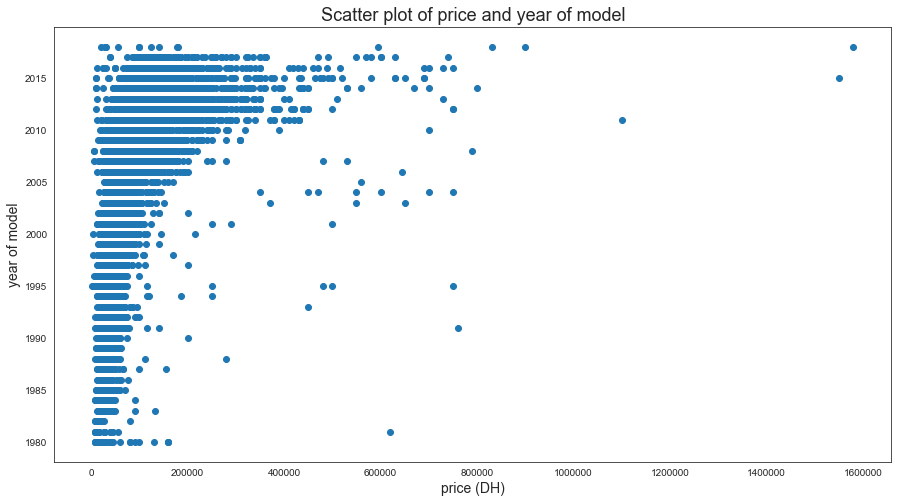

In [16]:
# eda
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.price, df.year_model)
plt.xlabel("price (DH)", fontsize=14)
plt.ylabel("year of model", fontsize=14)
plt.title("Scatter plot of price and year of model",fontsize=18)
plt.show()

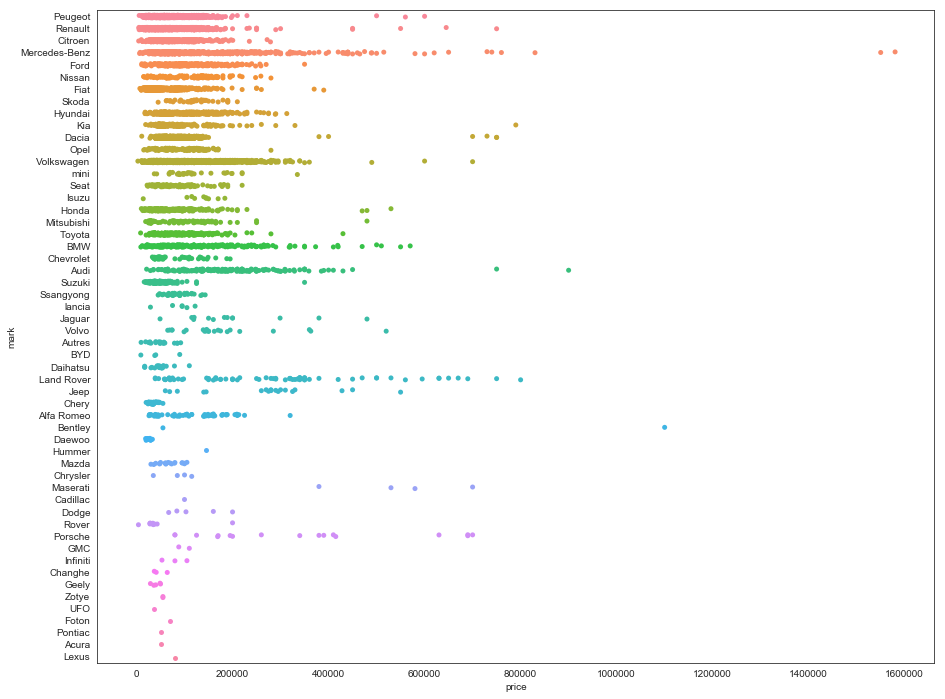

In [17]:
f, ax = plt.subplots(figsize=(15, 12))
sns.stripplot(data = df, x='price', y='mark', jitter=.1)
plt.show()

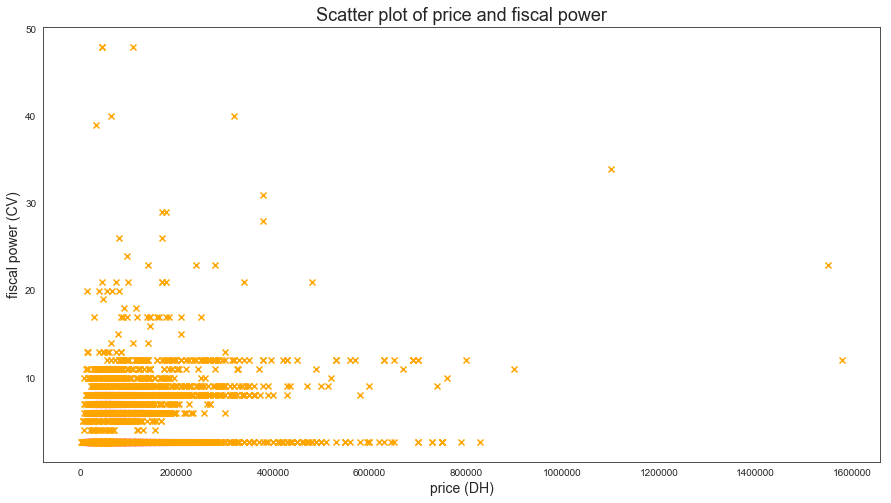

In [18]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.price, df.fiscal_power, c='orange', marker='x')
plt.xlabel("price (DH)", fontsize=14)
plt.ylabel("fiscal power (CV)", fontsize=14)
plt.title("Scatter plot of price and fiscal power",fontsize=18)
plt.show()

In [19]:
print('The length of unique marks feature is',len(df.mark.unique()))

The length of unique marks feature is 54


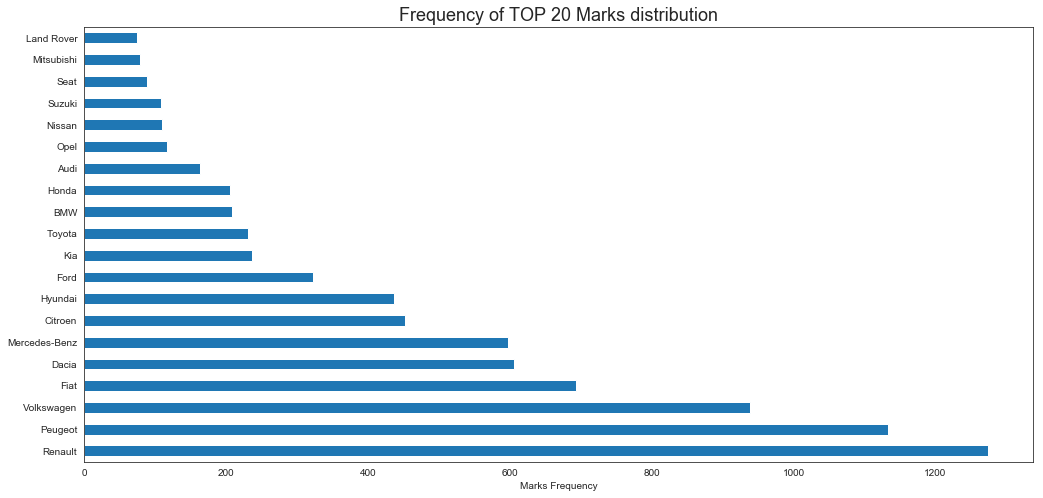

In [20]:

plt.figure(figsize=(17,8))
df.mark.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('Marks Frequency')
plt.title("Frequency of TOP 20 Marks distribution",fontsize=18)
plt.show()

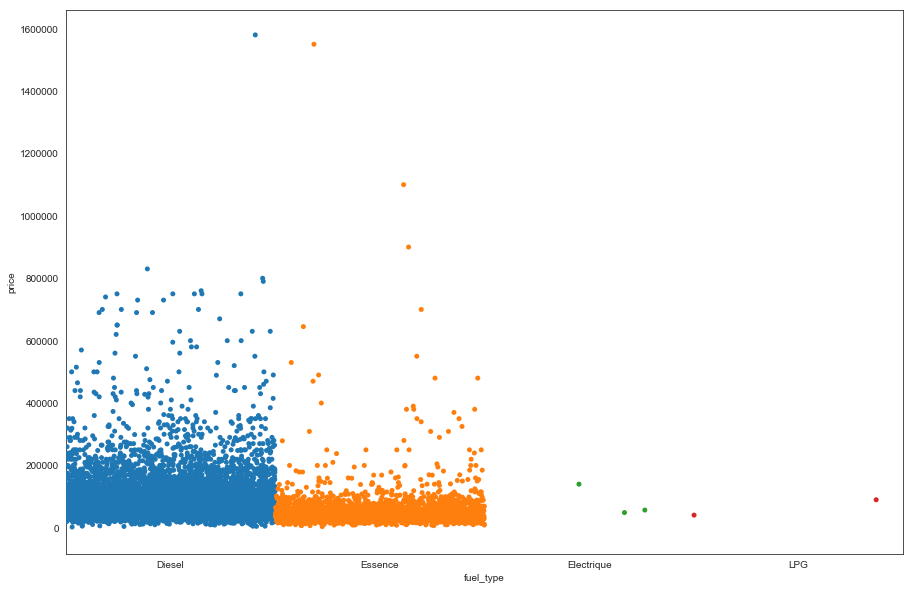

In [21]:

f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='fuel_type', y='price', jitter=.5)
plt.show()

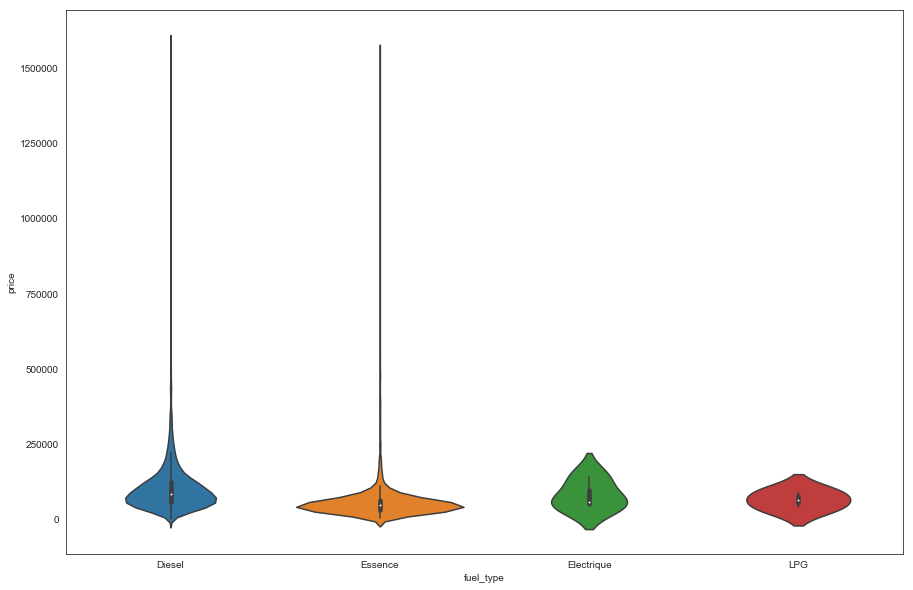

In [22]:
f, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data = df, x='fuel_type', y='price')
plt.show()

In [23]:
# define a color dictionarry by fuel_type
color_dict = {'Diesel': 'blue', 'Essence': 'orange', 'Electrique': 'yellow', 'LPG': 'magenta'}

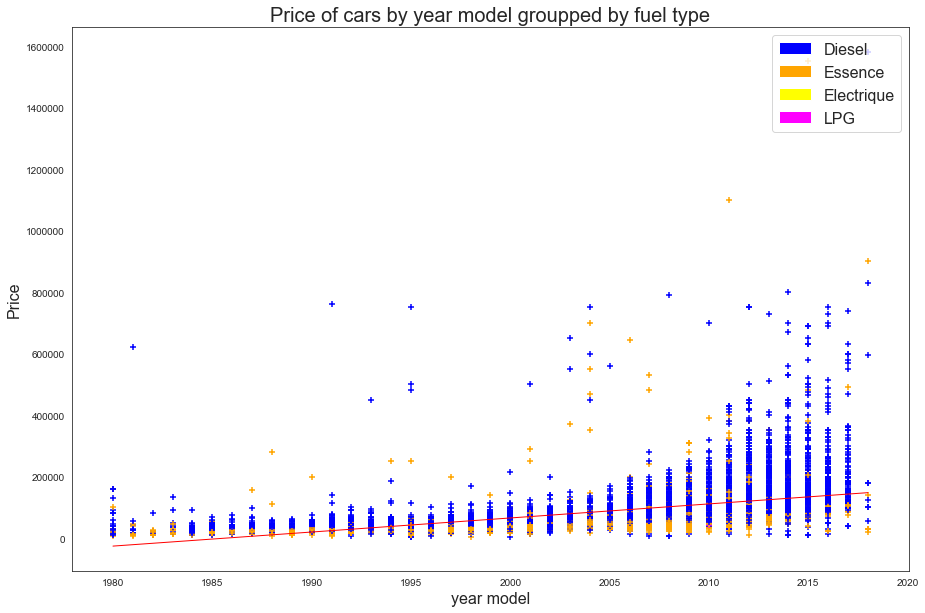

In [24]:
# set the figure size and plot the price & mileage points with the fit line in red
fig, ax = plt.subplots(figsize = (15,10))
plt.plot(np.unique(df.year_model), np.poly1d(np.polyfit(df.year_model, df.price, 1))(np.unique(df.year_model)), c = 'red', linewidth = 1)
plt.scatter(df.year_model, df.price, c = [color_dict[i] for i in df.fuel_type], marker='+')
# get the list of unique fuel type
fuel_type = df.fuel_type.unique()
recs = []
for i in fuel_type:
    recs.append(mpatches.Rectangle((2,2),1,1,fc=color_dict[i]))
    plt.legend(recs,fuel_type,loc=1, fontsize = 16)

plt.title('Price of cars by year model groupped by fuel type', 
          fontsize = 20)
plt.ylabel('Price', fontsize = 16)
plt.xlabel('year model', fontsize = 16)

xvals = ax.get_xticks()
ax.set_xticklabels(['{}'.format(int(x)) for x in xvals])

yvals = ax.get_yticks()
ax.set_yticklabels(['{}'.format(int(y)) for y in yvals])

plt.show()

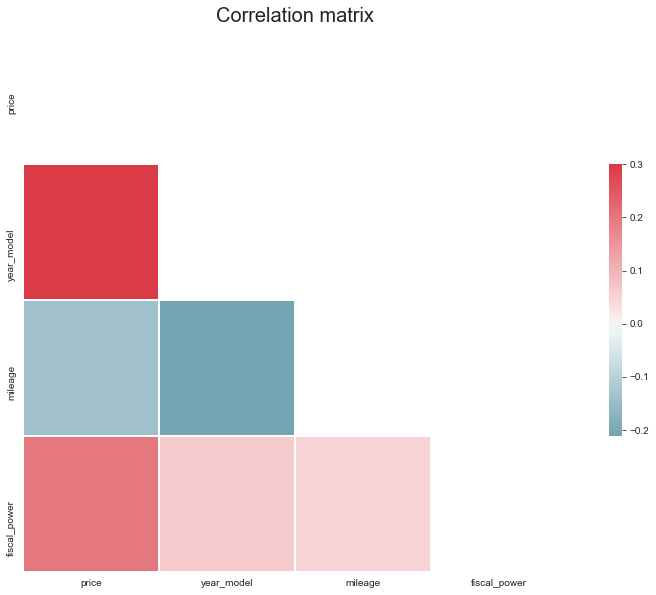

In [25]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = df.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

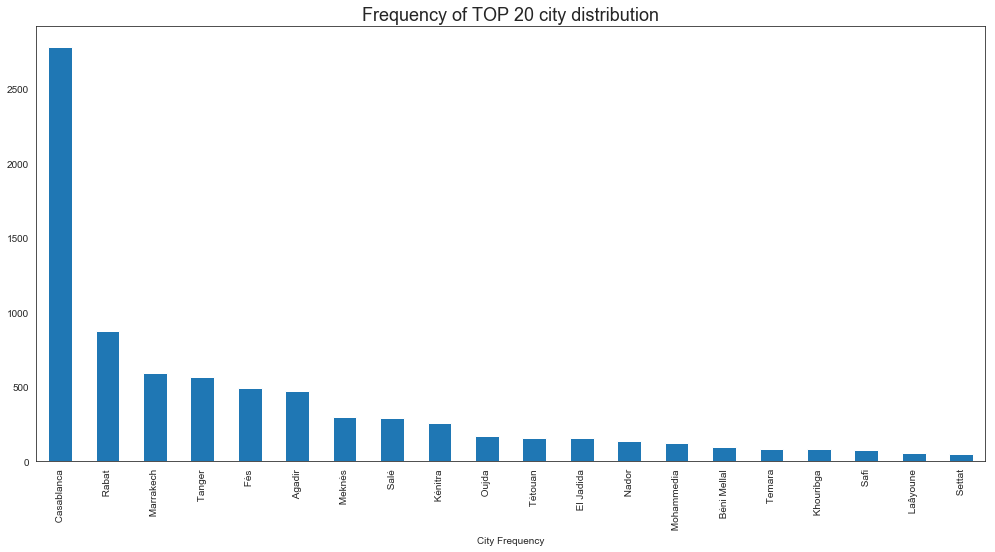

In [26]:
plt.figure(figsize=(17,8))
df.city.value_counts().nlargest(20).plot(kind='bar')
plt.xlabel('City Frequency')
plt.title("Frequency of TOP 20 city distribution",fontsize=18)
plt.show()

In [27]:

## create a dataframefor testing
data = df[df.price < 400000]

In [28]:
data.head()


,price,year_model,mileage,fuel_type,mark,model,fiscal_power,city
0,135000,2013,164999.5,Diesel,Peugeot,508,2.631837,Temara
1,53000,2008,37499.5,Diesel,Renault,Clio,2.631837,Safi
2,59000,2007,184999.5,Diesel,Citroen,C3,6.000000,Fès
3,88000,2010,37499.5,Diesel,Mercedes-Benz,220,2.631837,Nador
4,60000,2009,134999.5,Essence,Ford,Fiesta,7.000000,Fès


In [29]:

print(len(data))
print(len(df))

8456
8553


In [30]:
X = data[['year_model', 'mileage', 'fiscal_power', 'fuel_type', 'mark']]
Y = data.price
X = pd.get_dummies(data=X)

In [31]:
X.head()

,year_model,mileage,fiscal_power,fuel_type_Diesel,fuel_type_Electrique,fuel_type_Essence,fuel_type_LPG,mark_Acura,mark_Alfa Romeo,mark_Audi,...,mark_Skoda,mark_Ssangyong,mark_Suzuki,mark_Toyota,mark_UFO,mark_Volkswagen,mark_Volvo,mark_Zotye,mark_lancia,mark_mini
0,2013,164999.5,2.631837,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008,37499.5,2.631837,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2007,184999.5,6.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,37499.5,2.631837,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009,134999.5,7.000000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# now we use the train_test_split function already available in sklearn library to split our data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

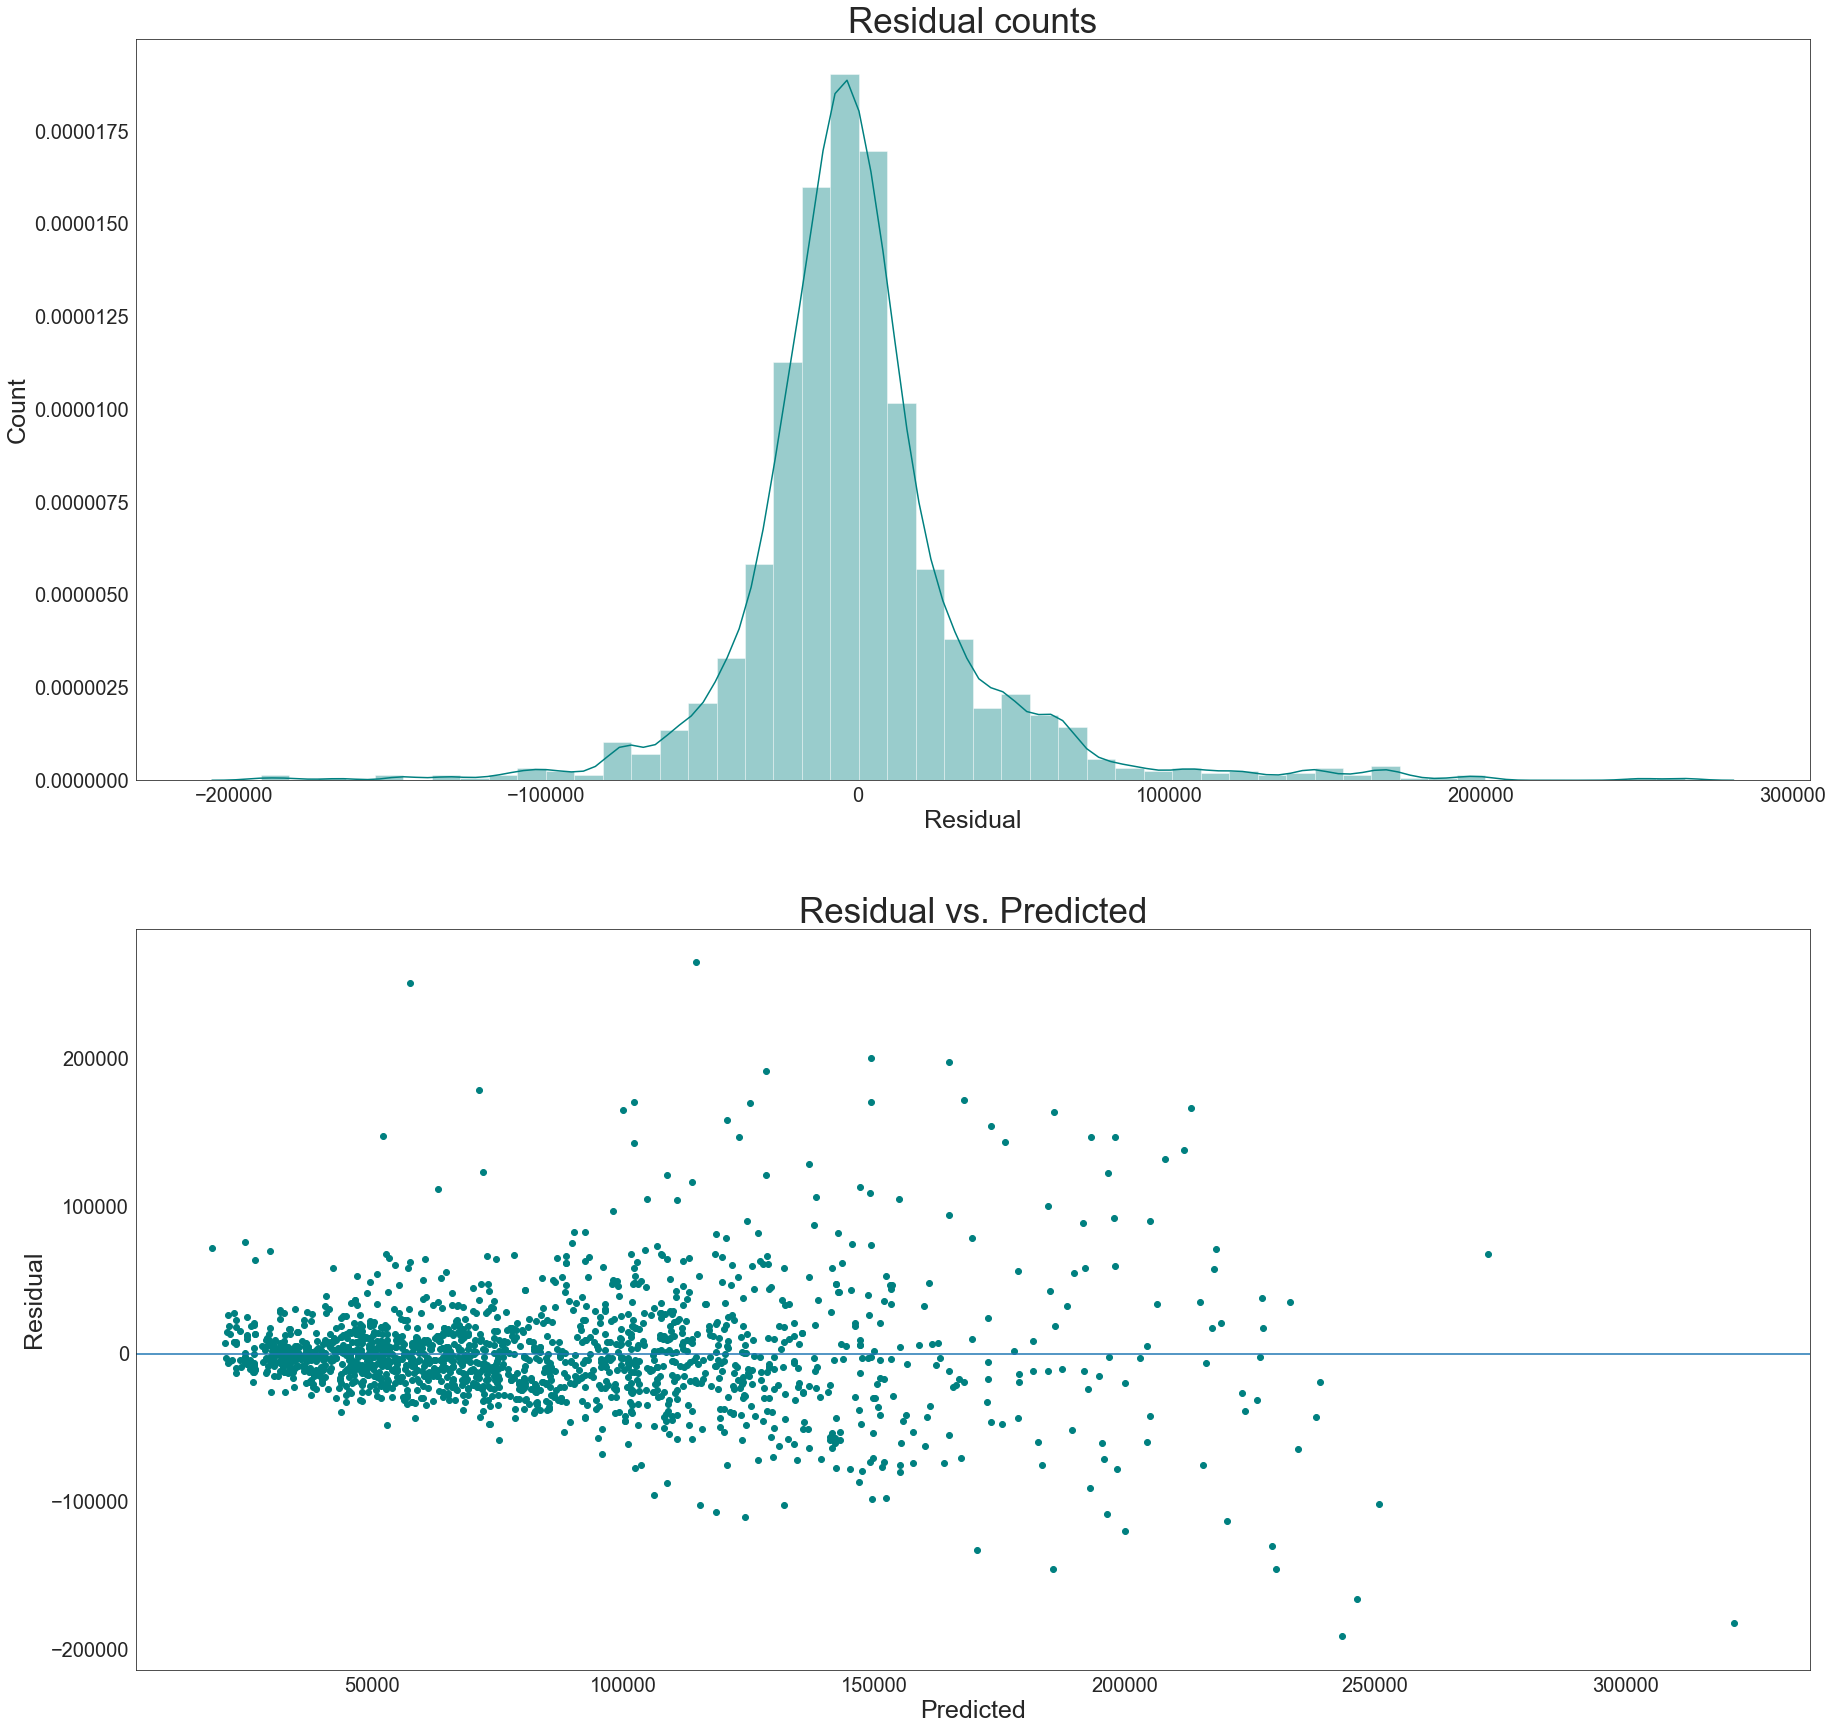

RMSE:
37709.6749493281


In [33]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [34]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.56


In [35]:
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)

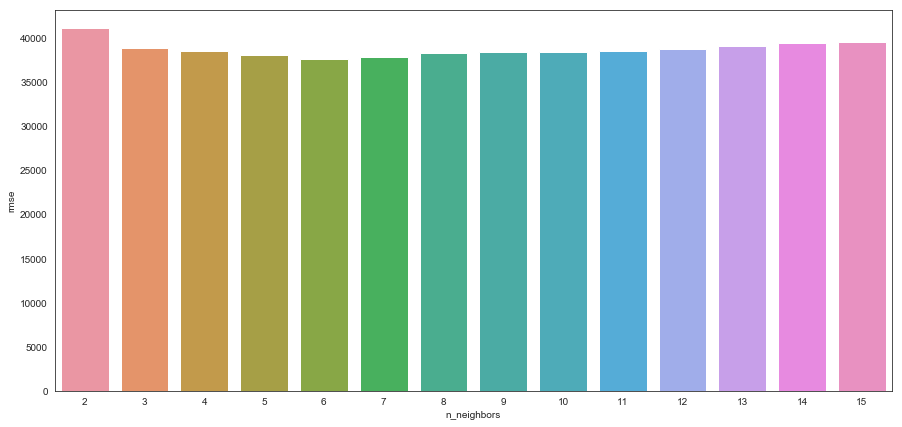

In [36]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

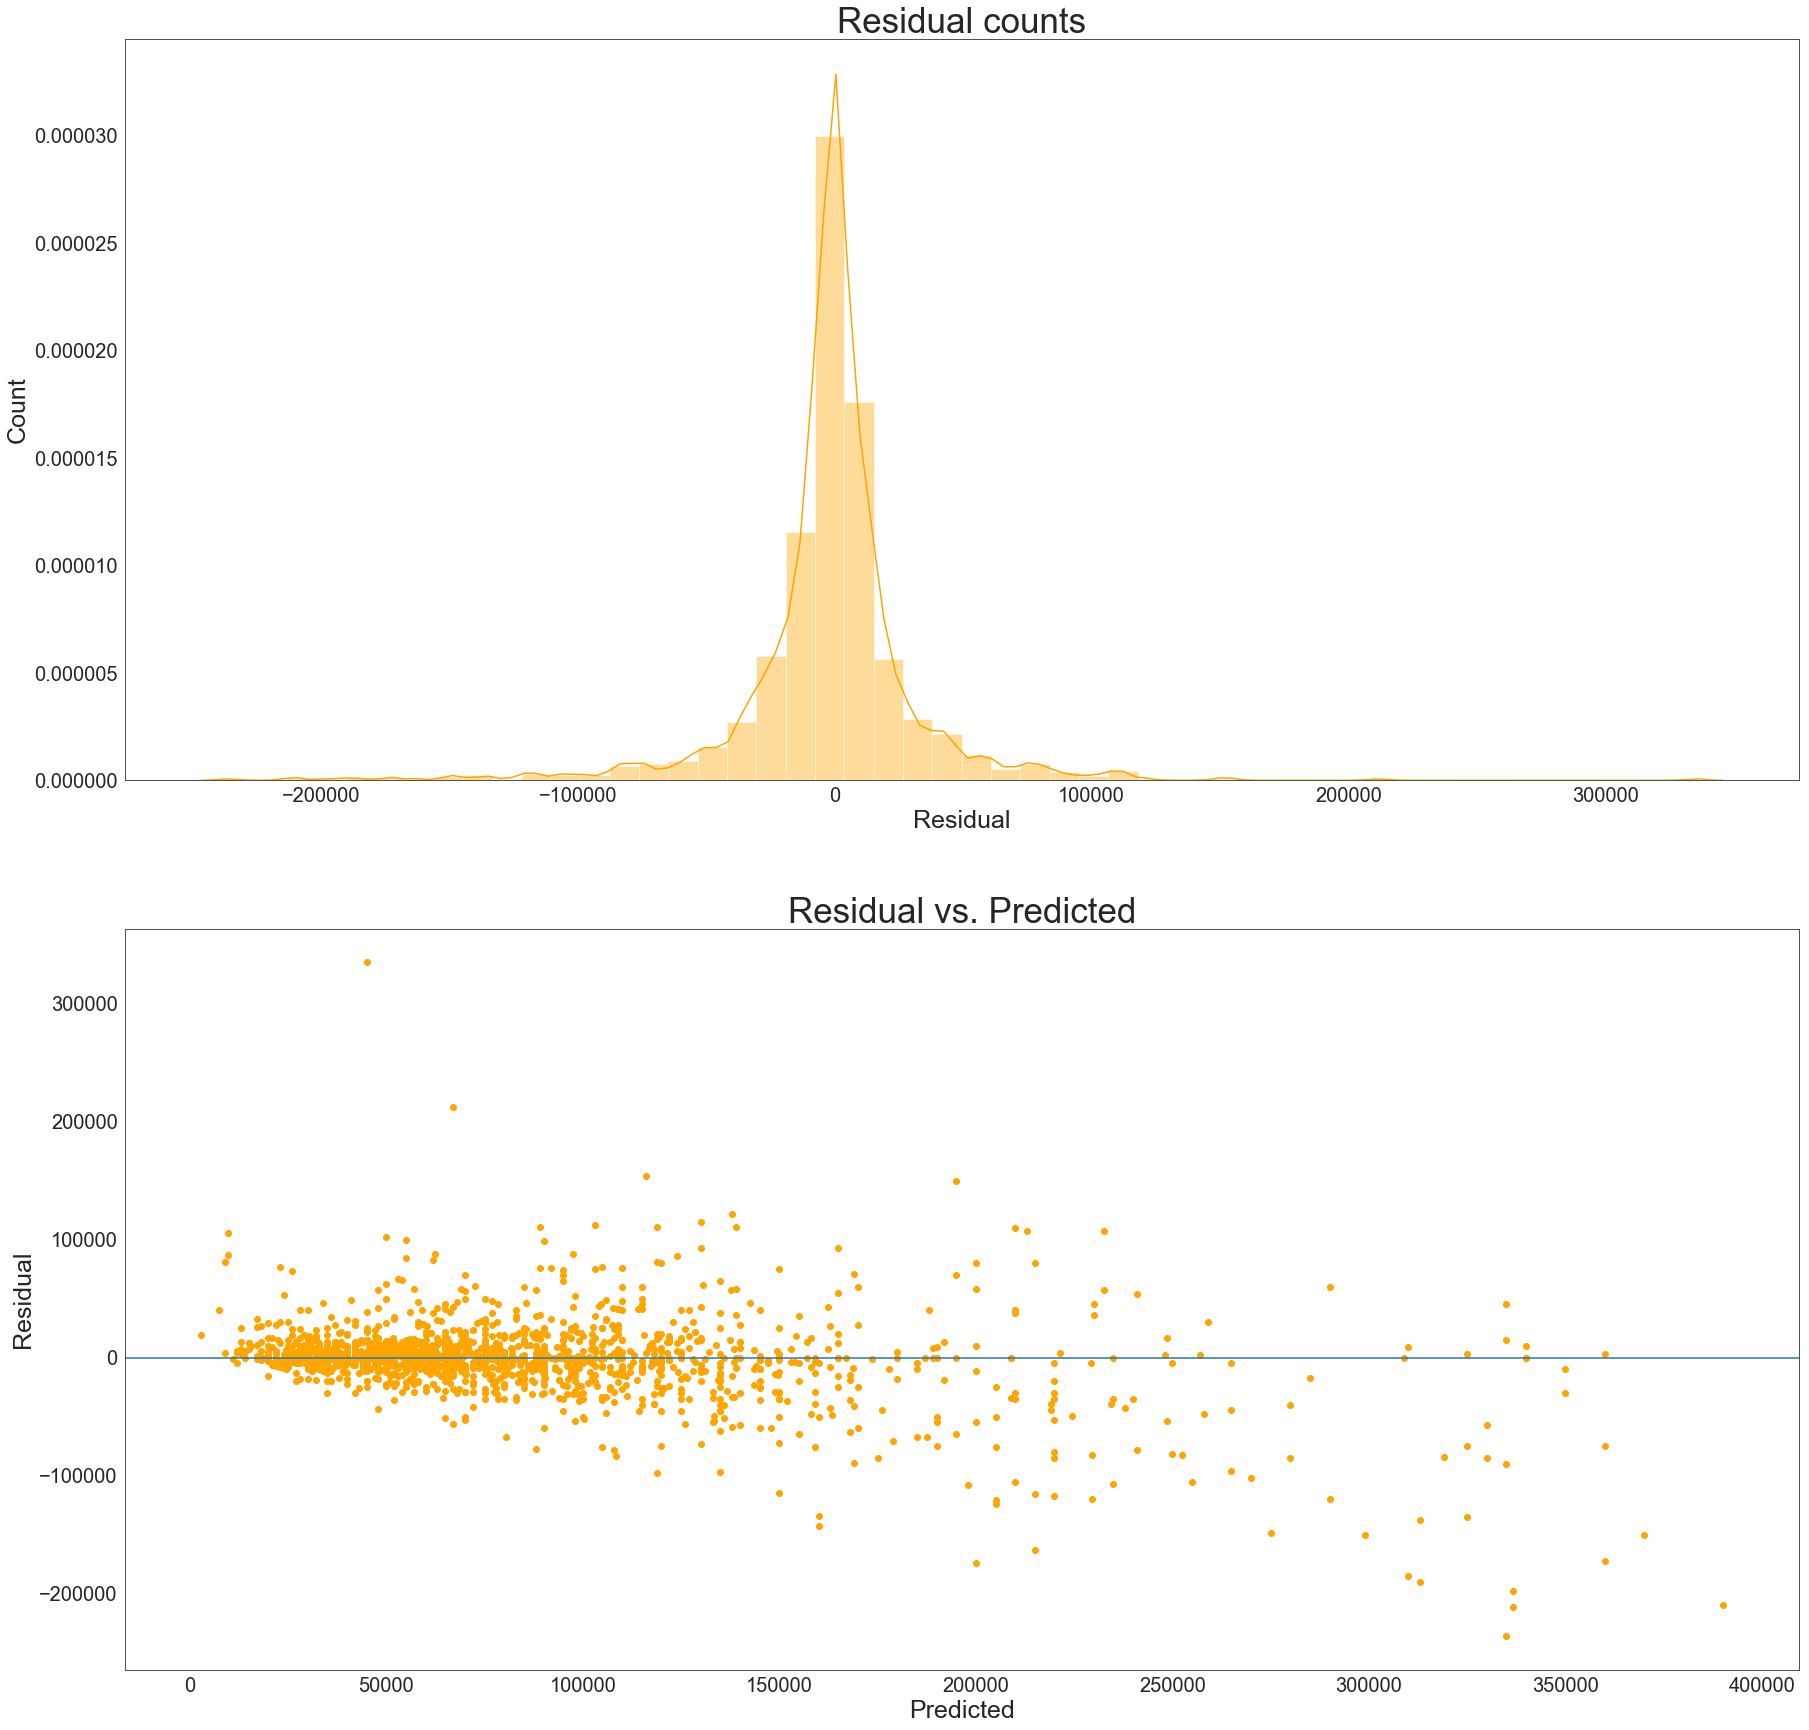

RMSE:
34149.850325923326


In [37]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [38]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.64


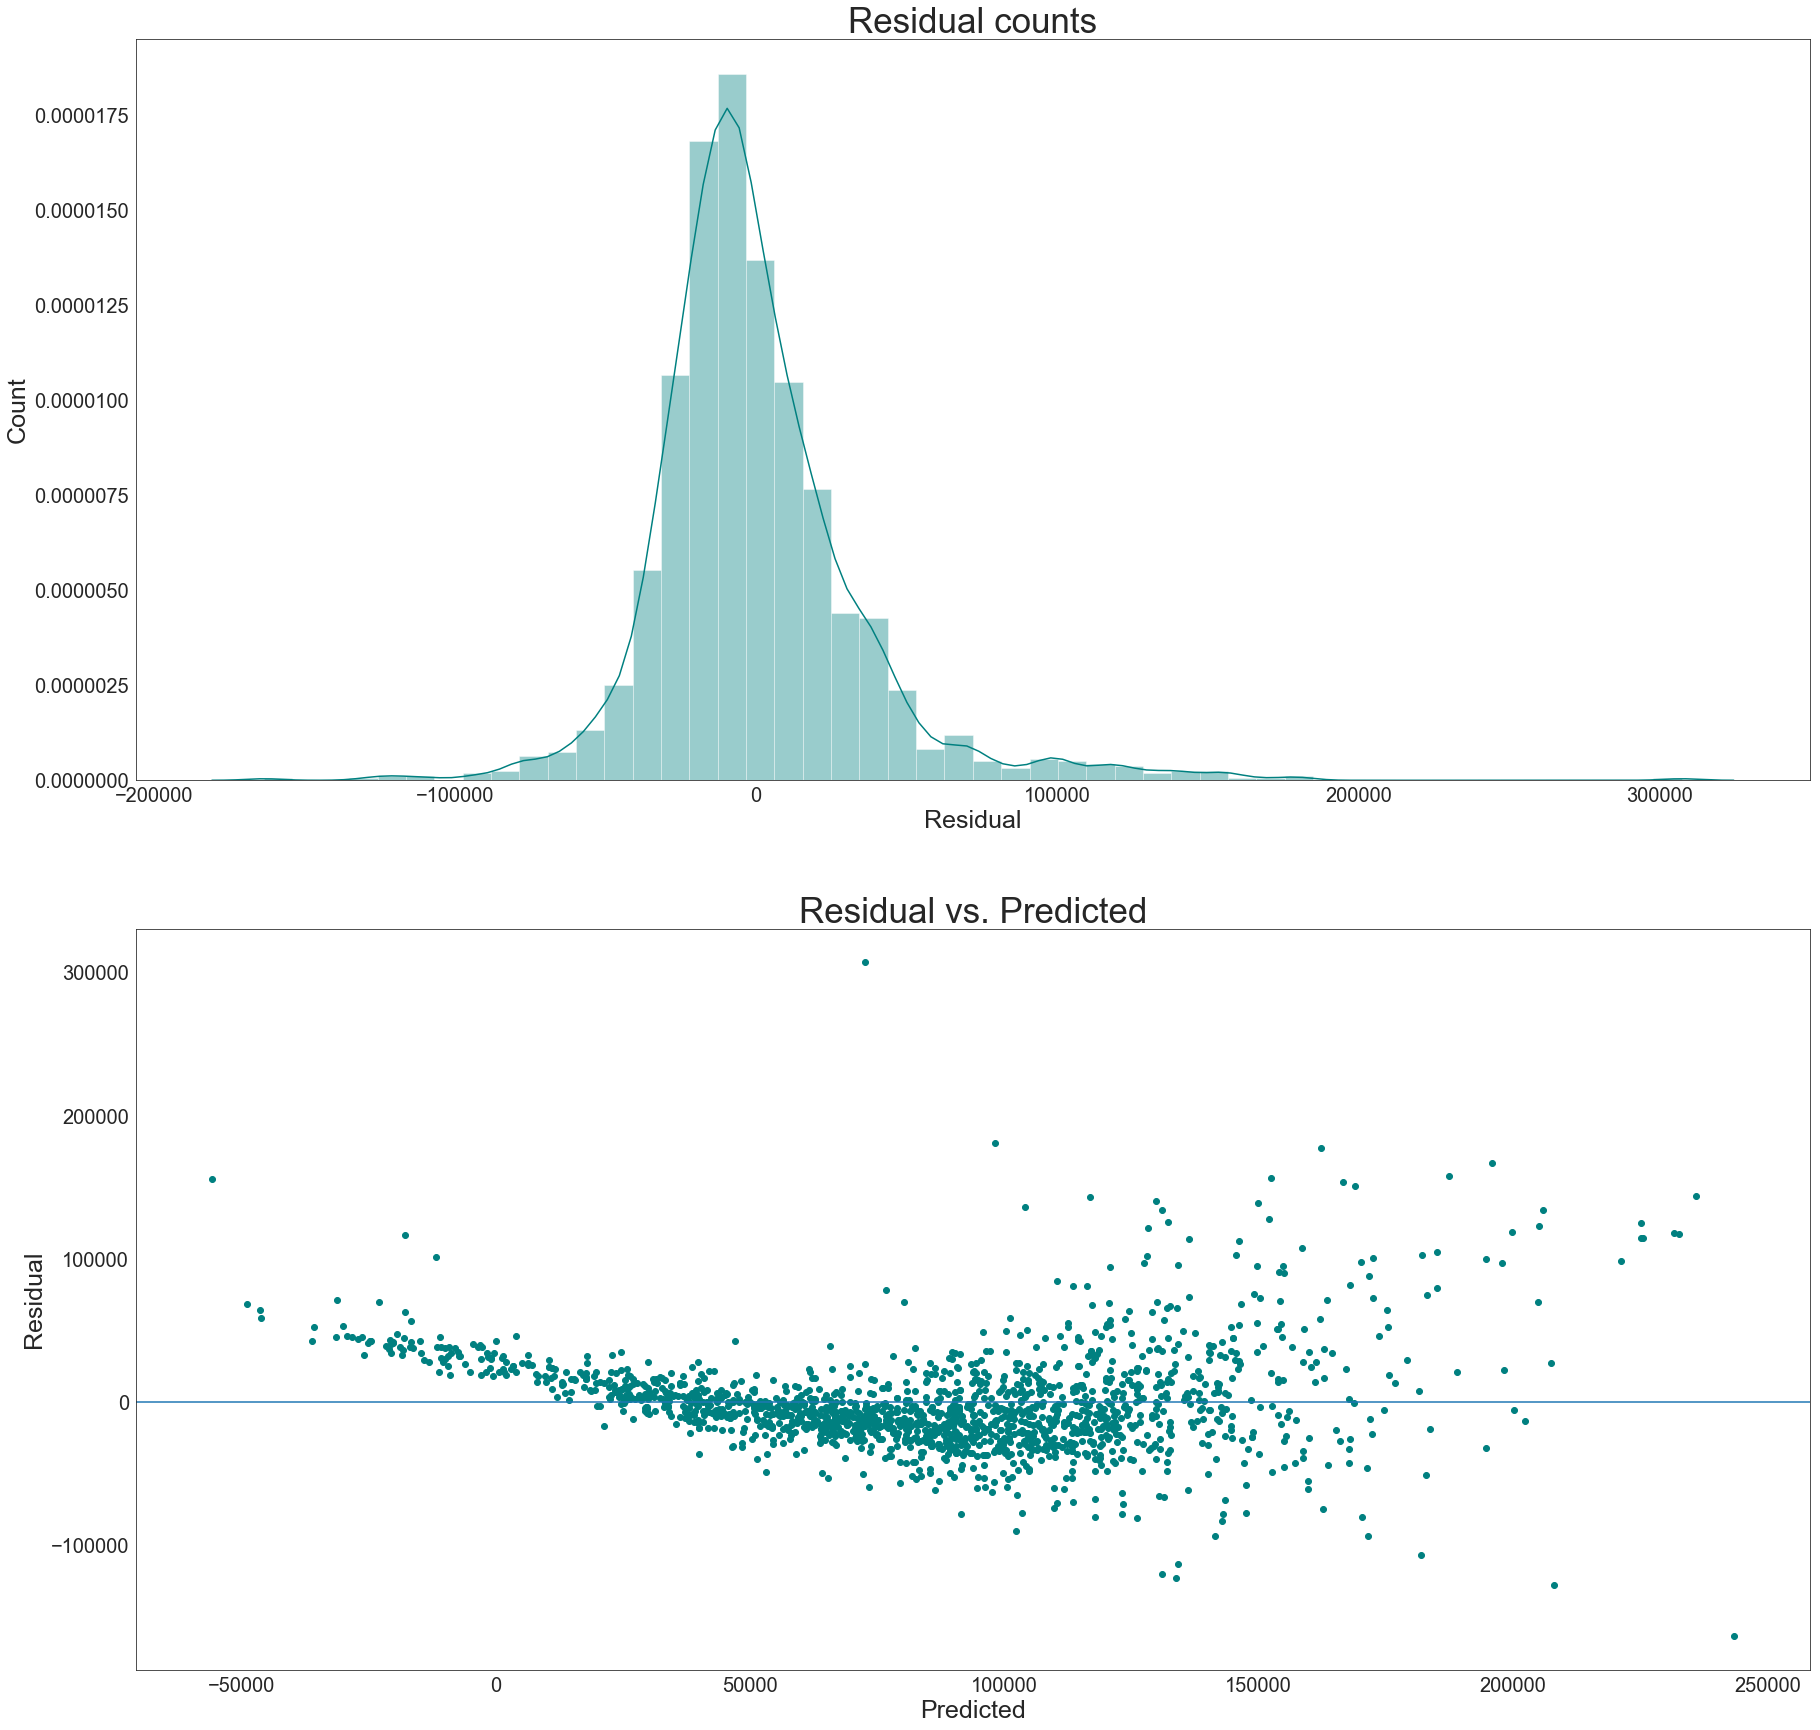

RMSE:
34865.07324135223


In [39]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [40]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.62


In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

r_sq = []
deep = []
mean_scores = []

#loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}
for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss ='ls', max_depth=n)
    gbr.fit (X, Y)
    deep.append(n)
    r_sq.append(gbr.score(X, Y))
    mean_scores.append(cross_val_score(gbr, X, Y, cv=12).mean())

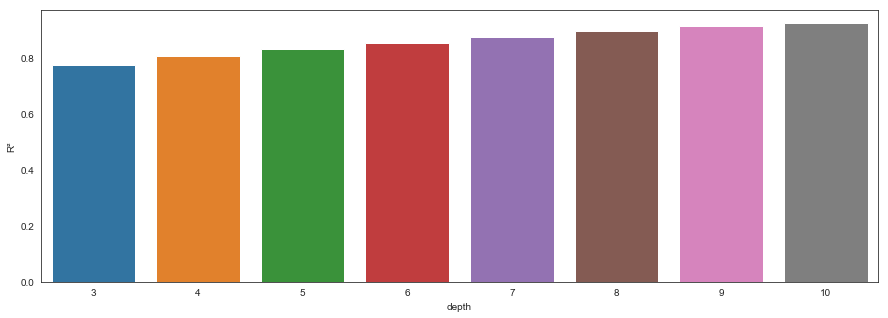

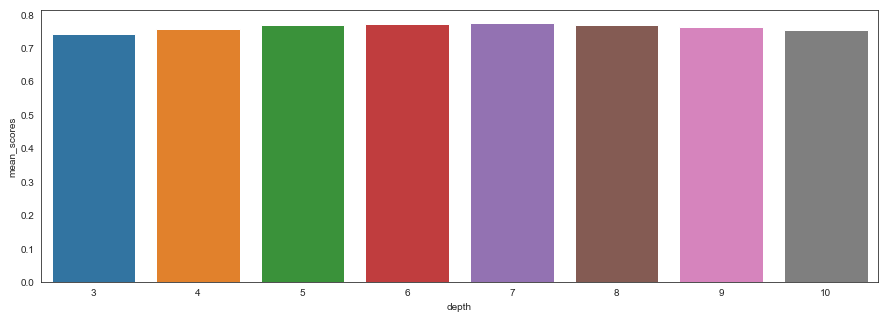

In [42]:
plt_gbr = pd.DataFrame()

plt_gbr['mean_scores'] = mean_scores
plt_gbr['depth'] = deep
plt_gbr['R²'] = r_sq

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='R²')
plt.show()

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='mean_scores')
plt.show()


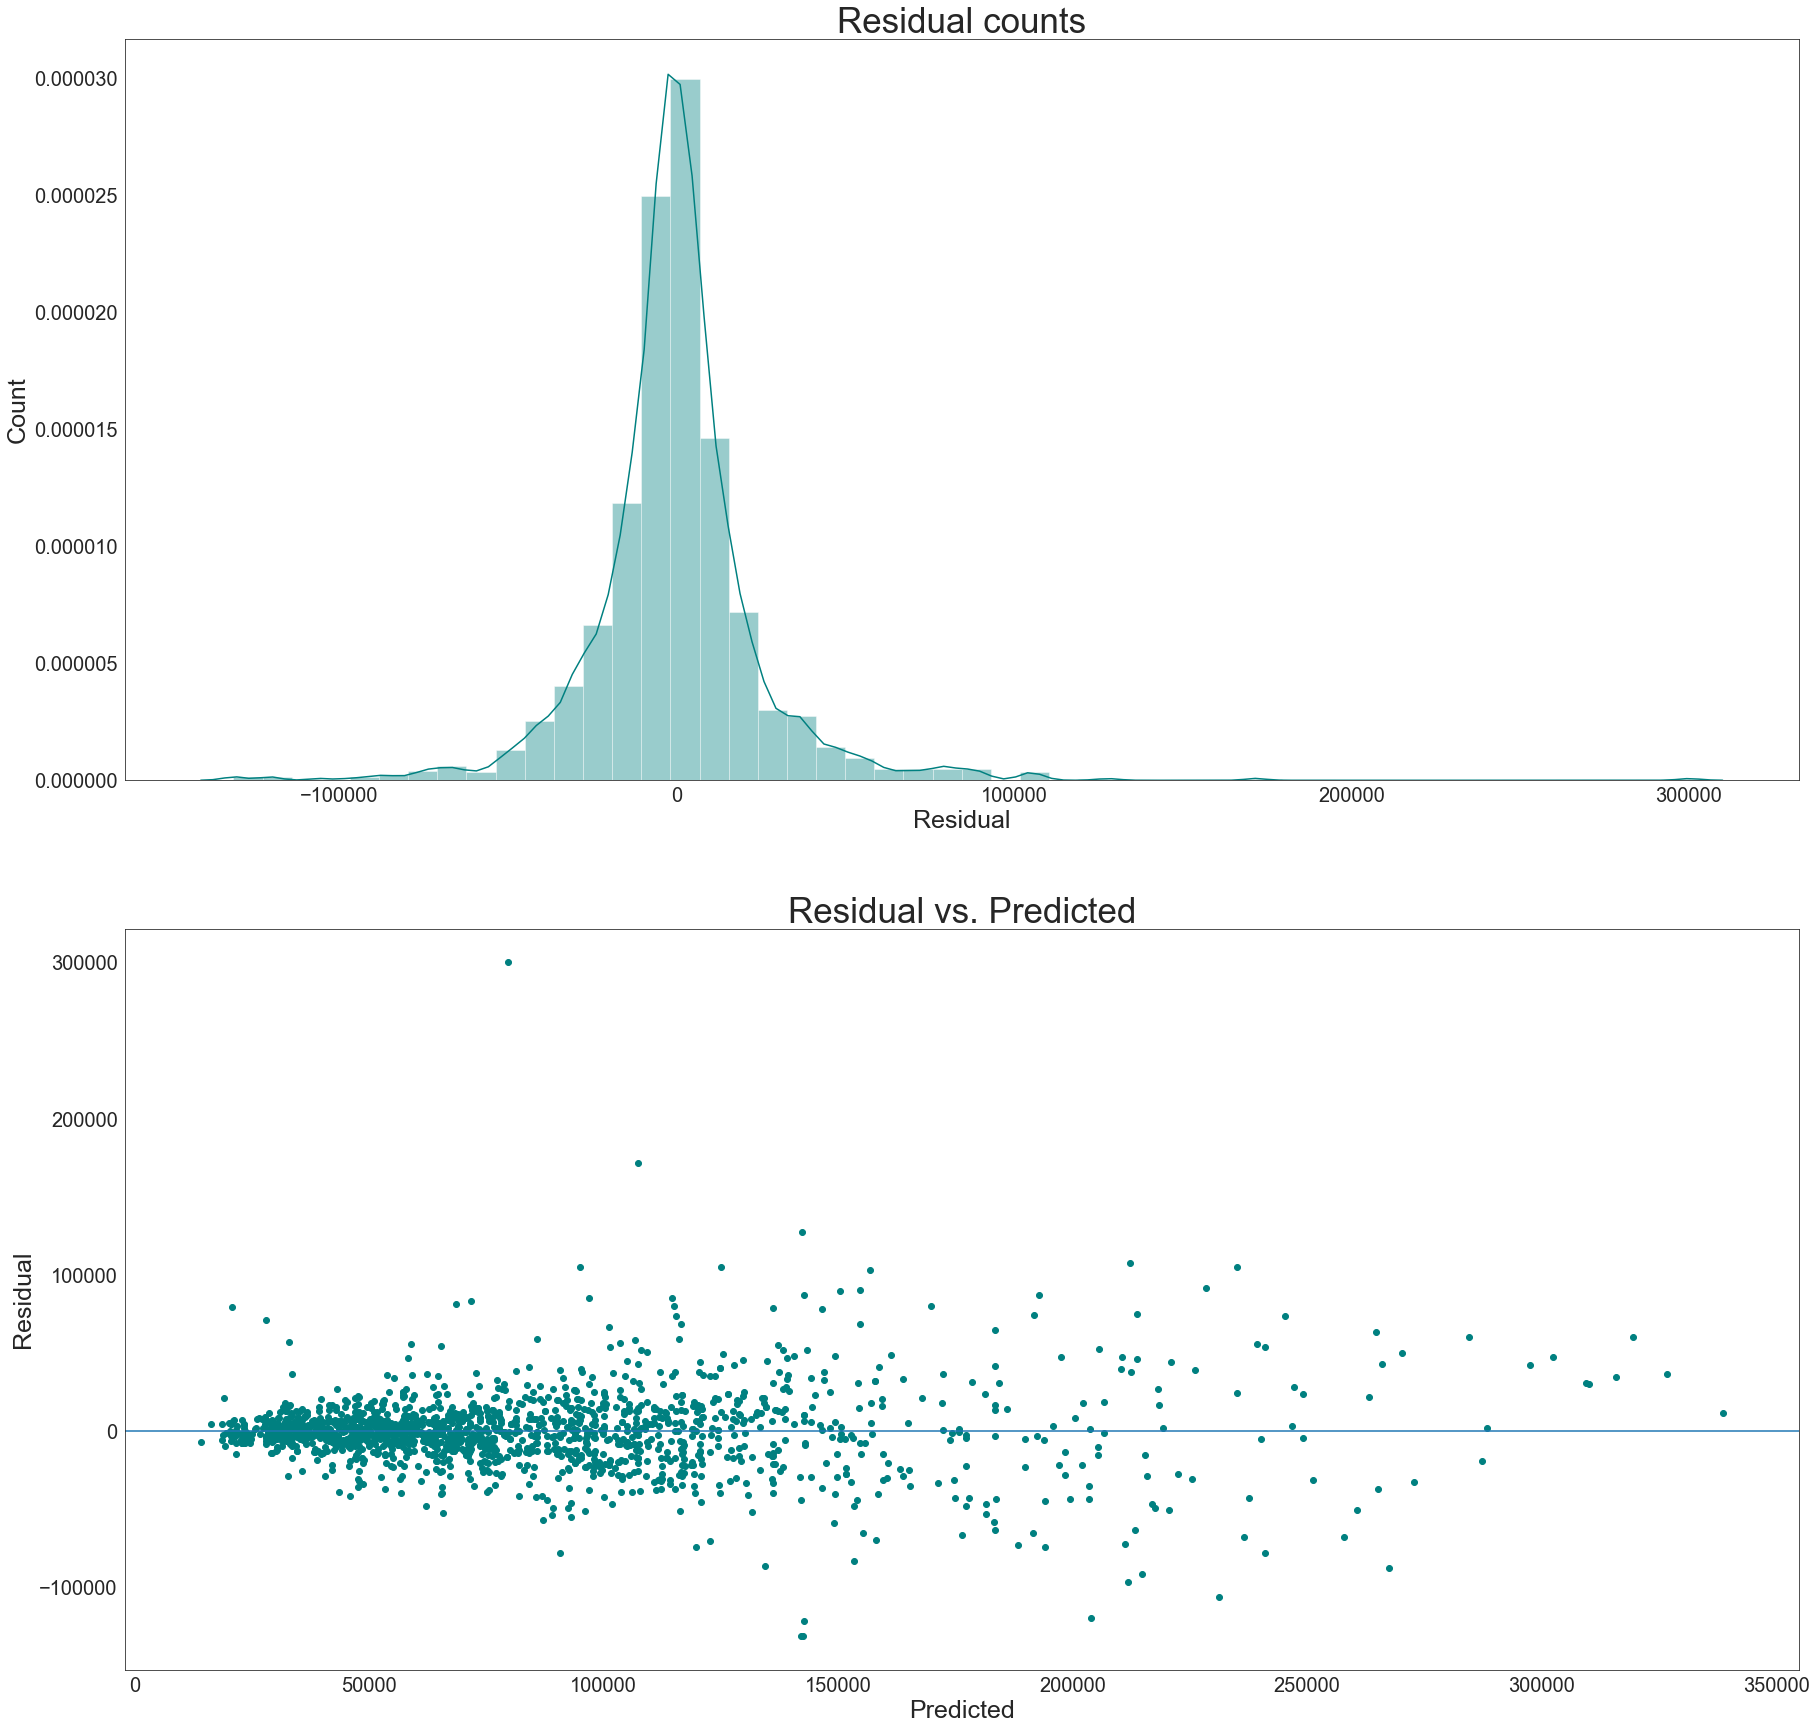


Cross Validation Scores:
[0.80299409 0.77415695 0.801038   0.73270576 0.74858674 0.85860699
 0.80608298 0.73285977 0.77870411 0.74175921 0.67799085 0.81085705]

Mean Score:
0.7721952083031782

RMSE:
25137.748764721207


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)


In [44]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.80


In [48]:
A = Y_test.values.reshape(-1, 1)
B = predicted.reshape(-1, 1)

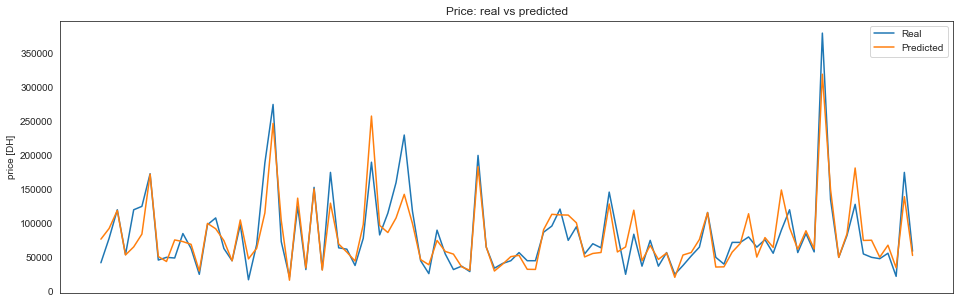

In [49]:
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price [DH]")
plt.xticks(())
plt.show()

In [50]:
# user_input = [2010, 124999.5, 6, 'Diesel', 'BMW']
user_input = {'year_model':2006, 'mileage':82499.5, 'fiscal_power':6, 'fuel_type':'Diesel', 'mark':'Dacia'}
def input_to_one_hot(data):
    # initialize the target vector with zero values
    enc_input = np.zeros(61)
    # set the numerical input as they are
    enc_input[0] = data['year_model']
    enc_input[1] = data['mileage']
    enc_input[2] = data['fiscal_power']
    ##################### Mark #########################
    # get the array of marks categories
    marks = df.mark.unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'mark_'+data['mark']
    # search for the index in columns name list 
    mark_column_index = X.columns.tolist().index(redefinded_user_input)
    #print(mark_column_index)
    # fullfill the found index with 1
    enc_input[mark_column_index] = 1
    ##################### Fuel Type ####################
    # get the array of fuel type
    fuel_types = df.fuel_type.unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'fuel_type_'+data['fuel_type']
    # search for the index in columns name list 
    fuelType_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[fuelType_column_index] = 1
    return enc_input

In [51]:
print(input_to_one_hot(user_input))

[2.00600e+03 8.24995e+04 6.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00]


In [52]:
a = input_to_one_hot(user_input)

In [53]:
price_pred = gbr.predict([a])

In [54]:
price_pred[0]

59156.00415095166

In [55]:
from sklearn.externals import joblib

joblib.dump(gbr, 'model.pkl')

['model.pkl']

In [56]:

gbr = joblib.load('model.pkl')

In [57]:
print("the best price for this Dacia is",gbr.predict([a])[0])

the best price for this Dacia is 59156.00415095166


In [58]:
# rest api
import requests, json

In [59]:
url = "http://127.0.0.1:8080/api"
data = json.dumps({'year_model':2014, 'mileage':12499.5, 'fiscal_power':7, 'fuel_type':'Diesel', 'mark':'Mercedes-Benz'})

resp = requests.post(url, data)

print(resp.json())

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8080): Max retries exceeded with url: /api (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000027C878DCB70>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
resp.json()['results'][0]